# Learning Curves

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

sns.set_theme(style='white')

[2.1203596] [[1.01403359 0.49175893]]


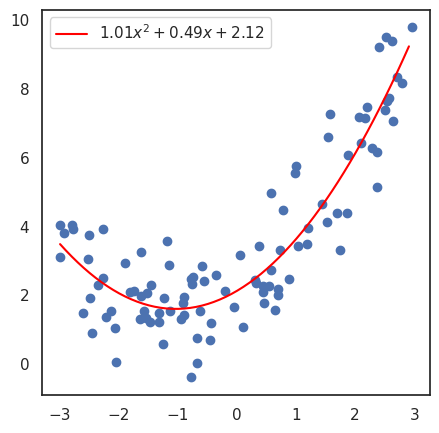

In [3]:
m, n = 100, 1
X = 6 * np.random.rand(m, n) - 3
a, b, c = 0.5, 1, 2
y = a * X**2 + b*X + c + np.random.randn(m, n)

pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

X_domain = np.arange(X.min(), X.max(), .1).reshape(-1, 1)
X_domain2 = pf.fit_transform(X_domain)
y_preds = X_domain2 @ lin_reg.coef_.T + lin_reg.intercept_

plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.plot(
    X_domain,
    y_preds,
    color="red",
    label=f"${lin_reg.coef_[0][0]:.2f}x^2 + {lin_reg.coef_[0][1]:.2f}x + {lin_reg.intercept_[0]:.2f}$",
)
plt.legend()
plt.show()

In [4]:
# Learning curve based on training set size
def plot_learning_curves(model, X, y, ax):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m].ravel())

        # get the training and validation prediction
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        # collect all the results
        train_errors.append(
            mean_squared_error(y_train[:m], y_train_predict)
        )
        val_errors.append(
            mean_squared_error(y_val, y_val_predict)
        )

    ax.plot(np.sqrt(train_errors), "r+", linewidth=2, label="train")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")

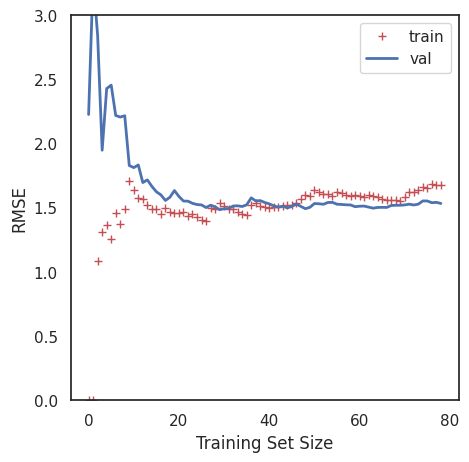

In [5]:
from sklearn.pipeline import Pipeline

_, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_learning_curves(LinearRegression(), X, y, ax)
ax.set_xlabel("Training Set Size")
ax.set_ylabel("RMSE")
ax.set_ylim(0, 3)
plt.legend()
plt.show()

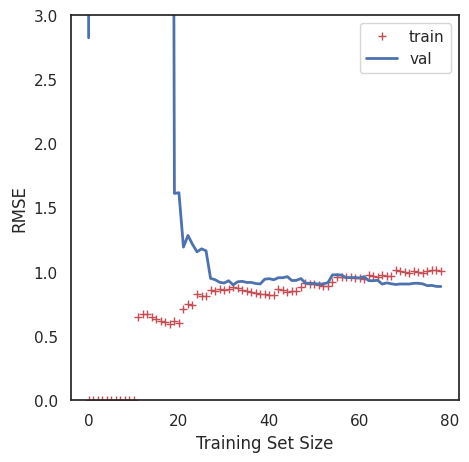

In [6]:
from sklearn.pipeline import Pipeline

pr = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

_, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_learning_curves(pr, X, y, ax)
ax.set_xlabel("Training Set Size")
ax.set_ylabel("RMSE")
ax.set_ylim(0, 3)
plt.legend()
plt.show()

Biggest takeaway from this chapter is that:
1. If your model is undefitting the training data, adding more training examples will not help

You need to instead:

1. Use a more complex model
2. Come up with better features

## The Bias/Variance Trade-off

|||
|-|-|
|Bias|Generalization error, due to wrong assumptions. High-bias models will underfit the training data.|
|Variance|Model is excessively sensitive to small variations. Likely to overfit training data.|
|Irreducible Error|Due to noisiness of the data. Solution: Fix the data sources.|

**This is actually common sense**:

Increase a model complexity => increase variance, reduces bias

Reduce complexity => increase bias, reduce variance